# Support Vector Classifier

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 0 ns (started: 2024-01-10 12:23:14 +06:00)


In [ ]:
datasets=[]
for i in range(0,70):
  df=pd.read_csv(f'../ProcessedDatasets/dataset{i}.csv')
  datasets.append(df)

time: 26.3 s (started: 2024-01-10 12:23:14 +06:00)


In [ ]:
for i in range(len(datasets)):
  datasets[i]=datasets[i].drop(['filename','Unnamed: 0'],axis=1)

time: 406 ms (started: 2024-01-10 12:23:40 +06:00)


In [ ]:
models=[]
for i in range(len(datasets)):
  models.append(make_pipeline(StandardScaler(), SVC(kernel='rbf')))

time: 0 ns (started: 2024-01-10 12:23:41 +06:00)


In [ ]:
X_train=[]
y_train=[]

time: 31 ms (started: 2024-01-10 12:23:41 +06:00)


In [ ]:
for i in range(len(datasets)):
  X_train.append(datasets[i].drop(['Bug Present'],axis=1).values)
  y_train.append(datasets[i]['Bug Present'].values)

time: 657 ms (started: 2024-01-10 12:23:41 +06:00)


In [ ]:
progress=0
for i in range(len(datasets)):
    print(progress/len(datasets)*100)
    models[i].fit(X_train[i],y_train[i])
    progress+=1

0.0
1.4285714285714286
2.857142857142857
4.285714285714286
5.714285714285714
7.142857142857142
8.571428571428571
10.0
11.428571428571429
12.857142857142856
14.285714285714285
15.714285714285714
17.142857142857142
18.571428571428573
20.0
21.428571428571427
22.857142857142858
24.285714285714285
25.71428571428571
27.142857142857142
28.57142857142857
30.0
31.428571428571427
32.857142857142854
34.285714285714285
35.714285714285715
37.142857142857146
38.57142857142858
40.0
41.42857142857143
42.857142857142854
44.285714285714285
45.714285714285715
47.14285714285714
48.57142857142857
50.0
51.42857142857142
52.85714285714286
54.285714285714285
55.714285714285715
57.14285714285714
58.57142857142858
60.0
61.42857142857143
62.857142857142854
64.28571428571429
65.71428571428571
67.14285714285714
68.57142857142857
70.0
71.42857142857143
72.85714285714285
74.28571428571429
75.71428571428571
77.14285714285715
78.57142857142857
80.0
81.42857142857143
82.85714285714286
84.28571428571429
85.7142857142857

# Performance Metrics

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split

param_grid = {}
dtree = SVC(kernel='rbf')
grid_search=[]
epochs=len(datasets)
for i in range(epochs):
    print(f'{i}th model: ')
    grid_search_tmp = GridSearchCV(dtree, param_grid, scoring='accuracy', cv=10)
    grid_search_tmp.fit(StandardScaler().fit(X_train[i]).transform(X_train[i]), y_train[i])
    grid_search.append(grid_search_tmp)
    print("Progress=",(i/epochs)*100)



0th model: 


In [ ]:
from sklearn.metrics import accuracy_score

time: 0 ns (started: 2024-01-10 16:39:38 +06:00)


In [ ]:
test_set=pd.read_csv(f'../ProcessedDatasets/test_set.csv')
test_set=test_set.drop(['filename','Unnamed: 0'],axis=1)
X_test,y_test=test_set.drop(['Bug Present'],axis=1).values,test_set['Bug Present'].values
y_test_pred=[]
for i in range(len(datasets)):
  y_pred=models[i].predict(X_test)
  y_test_pred.append(y_pred)







time: 1h 6min 24s (started: 2024-01-10 16:39:38 +06:00)


In [ ]:
result = []
y_test_pred=np.array(y_test_pred)
for column in y_test_pred.T:
    most_common = np.bincount(column).argmax()
    result.append(most_common)

result = np.array(result)

time: 31 ms (started: 2024-01-10 17:46:03 +06:00)


In [ ]:
result

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

time: 0 ns (started: 2024-01-10 17:46:03 +06:00)


In [ ]:
print("Accuracy on Test Set: ", accuracy_score(result,y_test)*100)

Accuracy on Test Set:  72.37289938310998
time: 15 ms (started: 2024-01-10 17:46:03 +06:00)


In [ ]:
test_accuracy=[]
for i in range(epochs):
    test_accuracy.append(grid_search[i].score(StandardScaler().fit(X_test).transform(X_test), y_test))
print("Accuracy with 10-fold Cross Validation: ",sum(test_accuracy)/epochs*100)

In [ ]:
from sklearn.metrics import roc_curve,auc

time: 0 ns (started: 2024-01-10 17:46:03 +06:00)


In [ ]:
fpr,tpr, _ = roc_curve(y_test, result)
roc_auc = auc(fpr,tpr)

time: 31 ms (started: 2024-01-10 17:46:03 +06:00)


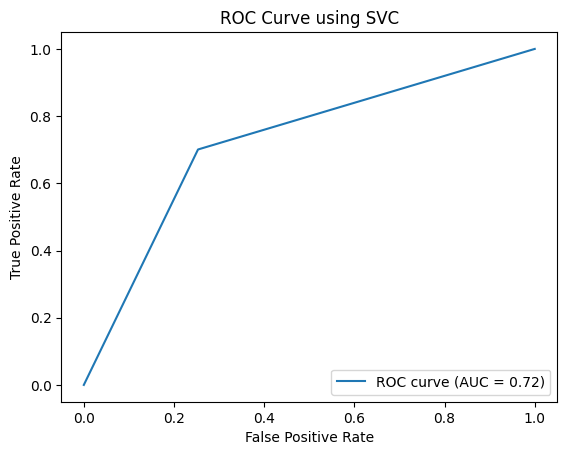

time: 187 ms (started: 2024-01-10 17:46:03 +06:00)


In [ ]:
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using SVC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

time: 219 ms (started: 2024-01-10 17:46:03 +06:00)


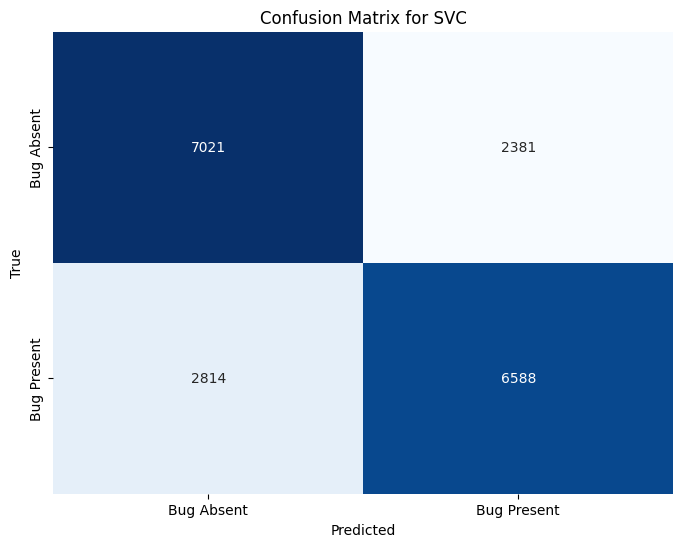

time: 78 ms (started: 2024-01-10 17:46:03 +06:00)


In [ ]:
confusion=confusion_matrix(y_test,result)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Bug Absent', 'Bug Present'], yticklabels=['Bug Absent', 'Bug Present'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVC')

plt.show()

In [ ]:
!pip install joblib


time: 2.67 s (started: 2024-01-10 17:46:03 +06:00)


In [ ]:
import joblib
joblib.dump(models, '../svm_model.joblib')

['../svm_model.joblib']

time: 17.7 s (started: 2024-01-10 20:48:21 +06:00)
